In [65]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns

# Question 1. What data do you have?

### Expain Here:

TODO

In [66]:
raw_df = pd.read_csv("survey_responses.csv")
df1 = raw_df.drop(raw_df.columns[[0, 1, 2, 3, 4, 5, 6, 10, 11, 12, 13, 16, 17, 18, 19, 21, 23, 24, 25, 26, 30, 31, 32, 33, 34, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 80, 81, 82, 83]],axis = 1)

### Clean Up Dataframe

In [67]:
df1.loc[:,'75. What energizes you?'] = df1.loc[:,'75. What energizes you?'].fillna(0)
df1.loc[:,'14. What is your major?'] = df1.loc[:,'14. What is your major?'].fillna("Unknown")
df2 = df1.replace(['Computational Mathematics','Computational Mathematics ', 'Computational Math', 'computational mathmatics','Mathematics ', "Math", 'Mathematics for Teaching Secondary School', 'Mathematics'], 'Computational Mathematics/Mathematics')
df2 = df2.replace(['Computer Science', 'Computer Science with Business Applications'], "ENCS/CSBA")
df2 = df2.replace('Electrical engineering', 'Electrical Engineering')
df2.rename(columns = {'14. What is your major?':'Major'}, inplace = True)

df2 = df2.replace([-1,-5], 0)
df2.loc[:,'15. What is your current GPA?'] = df2.loc[:,'15. What is your current GPA?'].fillna(0)
df2.loc[:,'36. What kinds of clubs and extracurriculars do you partake in most?'] = df2.loc[:, '36. What kinds of clubs and extracurriculars do you partake in most?'].fillna(0)
df2.loc[:,'20. How many units are you taking currently?'] = df2.loc[:,'20. How many units are you taking currently?'].fillna(0)
df2.loc[:,'22. How often do you attend lectures?'] = df2.loc[:,'22. How often do you attend lectures?'].fillna(0)
df2.loc[:,'27. How many times a week do you attend office hours on average?'] = df2.loc[:,'27. How many times a week do you attend office hours on average?'].fillna(0)
df2.loc[:,'28. On average, how many hours do you study per week? (excluding homework)'] = df2.loc[:,'28. On average, how many hours do you study per week? (excluding homework)'].fillna(0)
df2.loc[:,'29. On average, how many hours do you spend on homework per week?'] = df2.loc[:,'29. On average, how many hours do you spend on homework per week?'].fillna(0)
df2.fillna(0)
df2.rename(columns = {'15. What is your current GPA?':'GPA', '20. How many units are you taking currently?': 'Current Units Taken', '22. How often do you attend lectures?': 'Lecture Attendance', '27. How many times a week do you attend office hours on average?': 'Office Hours Attendance', '28. On average, how many hours do you study per week? (excluding homework)': 'Hours Spent on Studying (exc. HW)', '29. On average, how many hours do you spend on homework per week?': 'Hours Spent on Homework per Week'}, inplace = True)
df2['Study Hours'] = df2['Hours Spent on Homework per Week'] + df2['Hours Spent on Studying (exc. HW)']

In [4]:
df2

,7. How many siblings do you have?,"8. Are you a first, middle, last, or only child?","9. How often do you talk with your siblings (through text, phone calls, or other means)?",Major,GPA,Current Units Taken,Lecture Attendance,Office Hours Attendance,Hours Spent on Studying (exc. HW),Hours Spent on Homework per Week,...,"60. On average, how many hours do you use social media per day?","61. On average, how many hours do you spend watching movies per week?","62. On average, how many hours do you listen to music per day?","63. On average, how many hours do you play video games per week?",75. What energizes you?,76. How often do you initiate conversations in group settings?,"77. When going out, which of the following would you most prefer?",78. How do you decline invites to go out?,79. What's the first thing you do when facing a problem with your work?,Study Hours
0,1.0,First,Less than once a week,ENCS/CSBA,3.0 - 3.49,20.0,4.0,0.0,7.0,7.0,...,3.0,2.0,4.0,20.0,2.0,3.0,Having a plan but only following it loosely,Making up an excuse,Research potential solutions online,14.0
1,2.0,Middle,Almost every day,ENCS/CSBA,3.5 - 4.0,13.0,5.0,0.0,6.0,6.0,...,1.0,1.0,4.0,1.0,3.0,5.0,Having a well thought out itinerary,Politely declining,Give up and try again later,12.0
2,2.0,Middle,Once or twice a week,Neuroscience,3.5 - 4.0,12.0,5.0,0.0,7.0,4.0,...,2.0,1.0,2.0,5.0,2.0,3.0,Having a plan but only following it loosely,Apologize for not being able to go,Research potential solutions online,11.0
3,1.0,First,Almost every day,ENCS/CSBA,3.0 - 3.49,16.0,5.0,0.0,1.0,8.0,...,3.0,3.0,1.0,10.0,1.0,2.0,Having a well thought out itinerary,Making up an excuse,Research potential solutions online,9.0
4,1.0,First,Once or twice a week,ENCS/CSBA,3.5 - 4.0,16.0,5.0,0.0,4.0,10.0,...,1.0,1.0,2.0,10.0,4.0,5.0,Having a plan but only following it loosely,Politely declining,"Ask a TA, tutor, or professor for help",14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,1.0,Last,Less than once a week,ENCS/CSBA,3.0 - 3.49,12.0,4.0,0.0,4.0,8.0,...,4.0,2.0,4.0,0.0,3.0,3.0,Having a plan but only following it loosely,Saying you'll get back to them,Research potential solutions online,12.0
220,2.0,Last,Almost every day,ENCS/CSBA,3.0 - 3.49,13.0,5.0,1.0,12.0,15.0,...,1.0,3.0,2.0,6.0,3.0,4.0,Doing whatever seems right or fun at the moment,Politely declining,Give up and try again later,27.0
221,1.0,Last,Three or four times a week,ENCS/CSBA,2.5 - 2.99,13.0,3.0,0.0,10.0,10.0,...,5.0,2.0,20.0,5.0,4.0,4.0,Having a plan but only following it loosely,Politely declining,"Ask a TA, tutor, or professor for help",20.0
222,5.0,Last,Almost every day,ENCS/CSBA,3.5 - 4.0,17.0,5.0,0.0,10.0,10.0,...,1.0,2.0,4.0,1.0,1.0,3.0,Having a plan but only following it loosely,Apologize for not being able to go,"Ask a TA, tutor, or professor for help",20.0


# 2. What would you like to know?

Based on the data collected from CS105 and CS111 classes, are the stereotypes of introverts and extroverts true?

# 3. Explore the data.

### Joint Distribution

In [5]:
# countByMajor = df2.pivot_table(
#     index="Major", columns="75. What energizes you?",
#     values="20. How many units are you taking currently?",  # We can pretty much count any column, as long as there are no NaNs.
#     aggfunc="count" # The count function will count the number of non-null values.
# )
# countByMajor

In [68]:
#Created a new column called "Personality" based on Q75
df2.loc[(df2["75. What energizes you?"] >= 4, "Personality")] = 'Extrovert'
df2.loc[(df2["75. What energizes you?"] == 3, "Personality")] = 'Ambivert'
df2.loc[(df2["75. What energizes you?"] <= 2, "Personality")] = 'Introvert'
df2.loc[(df2["75. What energizes you?"] == 0, "Personality")] = 'Unknown'

In [69]:
#Distribution of Personality based on Major
countByMajor = df2.pivot_table(
    index="Major", columns="Personality",
    values="Current Units Taken",  # We can pretty much count any column, as long as there are no NaNs.
    aggfunc="count", # The count function will count the number of non-null values.
    fill_value=0
)
countByMajor

Personality,Ambivert,Extrovert,Introvert,Unknown
Major,,,,
Business Admin,1,0,0,0
Chemical Engineering,1,0,0,0
Chemistry,1,0,0,0
Computational Mathematics/Mathematics,4,0,5,0
Computer Engineering,8,5,7,0
Data Science,16,5,6,0
ENCS/CSBA,54,48,51,4
Electrical Engineering,0,0,1,0
Neuroscience,0,0,2,0


In [8]:
joint_prob = pd.crosstab(df2["Major"], df2["Personality"], normalize=True)
joint_prob

Personality,Ambivert,Extrovert,Introvert,Unknown
Major,,,,
Business Admin,0.004464,0.000000,0.000000,0.000000
Chemical Engineering,0.004464,0.000000,0.000000,0.000000
Chemistry,0.004464,0.000000,0.000000,0.000000
Computational Mathematics/Mathematics,0.017857,0.000000,0.022321,0.000000
Computer Engineering,0.035714,0.022321,0.031250,0.000000
Data Science,0.071429,0.022321,0.026786,0.000000
ENCS/CSBA,0.241071,0.214286,0.227679,0.017857
Electrical Engineering,0.000000,0.000000,0.004464,0.000000
Neuroscience,0.000000,0.000000,0.008929,0.000000


<AxesSubplot:xlabel='Personality', ylabel='Major'>

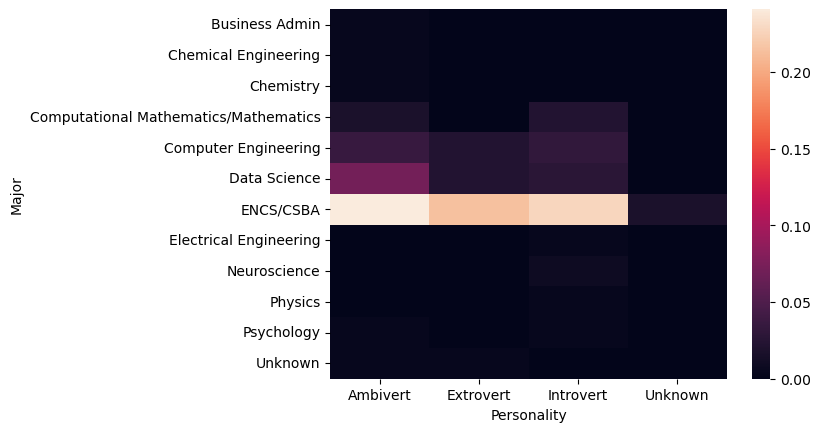

In [9]:
sns.heatmap(joint_prob)

# Bar Graph

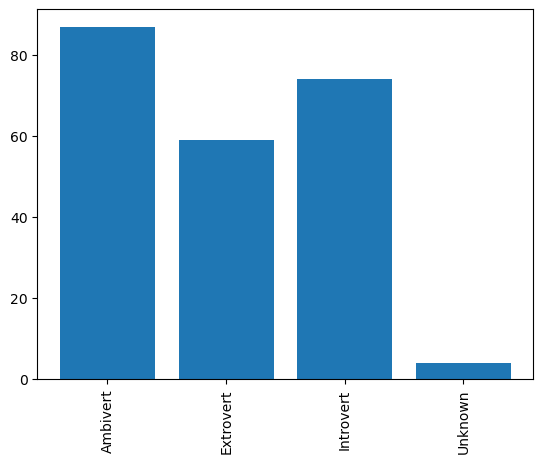

In [10]:
#Bar Graph to Show How the Distribution of Personality from the entire data
personalityCount = df2.groupby("Personality")["Major"].count()
plt.bar(personalityCount.index,personalityCount)
plt.xticks(rotation=90)
plt.show()

# Radar Chart

In [11]:
#Radar Chart showing Academic Performance based on Personality
# 15. What is your current GPA?
# 20. How many units are you taking currently?
# 22. How often do you attend lectures?
# 27. How many times a week do you attend office hours on average?
# 28. On average, how many hours do you study per week? (excluding homework)
# 29. On average, how many hours do you spend on homework per week?

df3 = pd.DataFrame({'Personality' : df2['Personality'], 'GPA': df2['GPA'], 'Current Units Taken': df2['Current Units Taken'], 'Total Study Hours': df2['Study Hours'], 'Lecture Attendance': df2['Lecture Attendance'], 'Office Hours Attendance': df2['Office Hours Attendance']})
# df3


In [12]:
df3 = df3.replace('0 - 1.49', 0.75)
df3 = df3.replace('1.5 - 1.99', 1.75)
df3 = df3.replace('2.0 - 2.49', 2.25)
df3 = df3.replace('2.5 - 2.99', 2.75)
df3 = df3.replace('3.0 - 3.49', 3.25)
df3 = df3.replace('3.5 - 4.0', 3.75)
df3_mean = df3.groupby('Personality').mean()
df3_mean
df3_new = pd.DataFrame({'Personality' : df3_mean.index, 'GPA': df3_mean['GPA'], 'Current Units Taken': df3_mean['Current Units Taken'], 'Total Study Hours': df3_mean['Total Study Hours'], 'Lecture Attendance': df3_mean['Lecture Attendance'], 'Office Hours Attendance': df3_mean['Office Hours Attendance']}).reset_index(drop=True)
df3_new


,Personality,GPA,Current Units Taken,Total Study Hours,Lecture Attendance,Office Hours Attendance
0,Ambivert,3.316092,14.229885,16.735632,4.126437,0.793103
1,Extrovert,3.309322,15.322034,21.627119,4.152542,0.694915
2,Introvert,3.432432,14.486486,16.445946,4.324324,0.567568
3,Unknown,3.375000,14.750000,3.500000,2.750000,0.250000


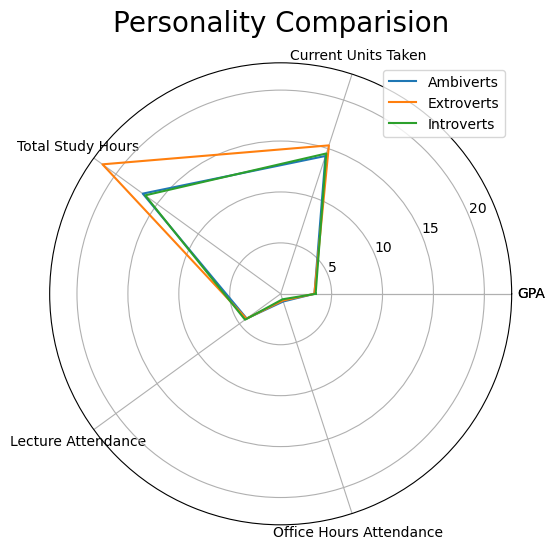

In [13]:
categories=np.array(['GPA', 'Current Units Taken', 'Total Study Hours', 'Lecture Attendance', 'Office Hours Attendance'])
categories = [*categories, categories[0]]

a_stats=df3_new.loc[0,categories].values
e_stats=df3_new.loc[1,categories].values
i_stats=df3_new.loc[2,categories].values
# a_stats = [*a_stats, a_stats[0]]
# e_stats = [*e_stats, e_stats[0]]
# i_stats = [*i_stats, i_stats[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(a_stats))

plt.figure(figsize=(6, 6))
plt.subplot(polar=True)
plt.plot(label_loc, a_stats, label='Ambiverts')
plt.plot(label_loc, e_stats, label='Extroverts')
plt.plot(label_loc, i_stats, label='Introverts')
plt.title('Personality Comparision', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

# Pie Chart

<AxesSubplot:ylabel='37. How many clubs and organizations are you part of?'>

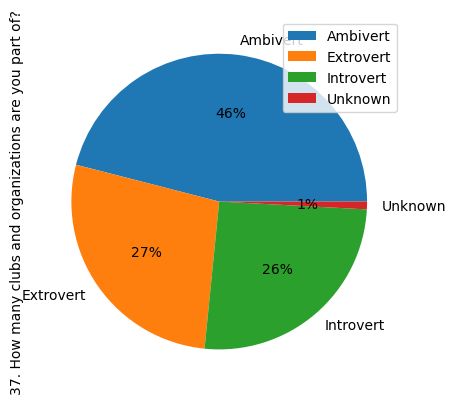

In [17]:
df2.groupby(['Personality']).sum().plot(kind='pie', y='37. How many clubs and organizations are you part of?', autopct='%1.0f%%')


# 4. Can you state any hypotheses or make predictions? Which tests can you apply to verify your hypothesis? 

In [89]:
clubsbyPers2 = df2.pivot_table(
    index="Personality", columns= "37. How many clubs and organizations are you part of?",
    values = "Current Units Taken",
    aggfunc= "count", # The count function will count the number of non-null values.
    #margins = 'True',
    #margins_name = 'Sum',
    fill_value=0
)
clubsbyPers2

37. How many clubs and organizations are you part of?,0.0,1.0,2.0,3.0,4.0,5.0
Personality,,,,,,
Ambivert,29,23,23,7,1,3
Extrovert,19,17,14,5,0,1
Introvert,29,28,12,3,0,0
Unknown,0,0,1,0,0,0


In [82]:
df = pd.DataFrame({'Personality': [0,2,3,4], 'Clubs': [1,72,86,56]})
df.head()

,Personality,Clubs
0,0,1
1,2,72
2,3,86
3,4,56


In [86]:
clubsbyPers2 = df2.pivot_table(
    index="Personality", columns= "37. How many clubs and organizations are you part of?",
    values = "Current Units Taken",
    aggfunc= "count", # The count function will count the number of non-null values.
    margins = 'True',
    margins_name = 'Sum',
    fill_value=0
)
clubsbyPers2

37. How many clubs and organizations are you part of?,0.0,1.0,2.0,3.0,4.0,5.0,Sum
Personality,,,,,,,
Ambivert,29,23,23,7,1,3,86
Extrovert,19,17,14,5,0,1,56
Introvert,29,28,12,3,0,0,72
Unknown,0,0,1,0,0,0,1
Sum,77,68,50,15,1,4,215


In [84]:
plt.scatter(df2.Personality,df2."37. How many clubs and organizations are you part of?")
plt.xlabel("Personality")
plt.ylabel("Clubs")
plt.show()

SyntaxError: invalid syntax (3267946328.py, line 1)

In [ ]:
dataf = df2

KeyError: 'Clubs'

In [92]:
r = clubsbyPers2.corr(method = 'pearson')
r

37. How many clubs and organizations are you part of?,0.0,1.0,2.0,3.0,4.0,5.0
37. How many clubs and organizations are you part of?,,,,,,
0.0,1.000000,0.985814,0.859294,0.785876,0.475433,0.499963
1.0,0.985814,1.000000,0.765368,0.686644,0.328060,0.347960
2.0,0.859294,0.765368,1.000000,0.982024,0.774597,0.860707
3.0,0.785876,0.686644,0.982024,1.000000,0.725589,0.868271
4.0,0.475433,0.328060,0.774597,0.725589,1.000000,0.942809
5.0,0.499963,0.347960,0.860707,0.868271,0.942809,1.000000


In [91]:
df.Personality.corr(df.Clubs, method = 'pearson')

0.7455253883346041

# 5. Test your hypotheses.

1. There is a correlation between a student’s academic performance and their personality trait. 

2. There is a correlation between whether or not a student is an only child and their personality trait.

3. There is a correlation between how many clubs a student participates in and their personality trait.

4. There is a correlation between social activity and their personality trait. 